# Install and import semantic-link library

In [1]:
# %pip install semantic-link

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 5, Finished, Available)

In [2]:
import sempy.fabric as fabric

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 6, Finished, Available)

# List workspaces
get an overview of workspaces with assigned Fabric Capacities

In [3]:
display(spark.createDataFrame(fabric.list_workspaces()).filter("`Is On Dedicated Capacity` = True"))

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 7, Finished, Available)

SynapseWidget(Synapse.DataFrame, 622b1f08-2888-4b8b-b9c7-eba378522b13)

# List datasets

In [4]:
workspace = "Project Trident" #use name or GUID
fabric.list_datasets(workspace)

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 8, Finished, Available)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,TridentDWH,d2d86caf-8317-4624-8b1a-e1db086cf7d6,2021-02-12 23:00:58,NaT
1,Warehouse1,97554d68-d0c7-4b30-9186-981d3ddf8a86,2021-02-12 23:00:58,NaT
2,TridentDWH-SQL,655e4910-2343-4e5e-b3ce-0751cb3dd591,2021-02-12 23:00:58,NaT
3,LakehouseGold,0e432df6-2232-4f59-beac-fc2f0a7caad5,2021-02-12 23:00:58,NaT
4,TridentLakehouse,328c55e4-d6c6-4218-857f-da7dd9d210f8,2021-02-12 23:00:58,NaT
5,BackendTest,a120701b-ba52-4a6b-a9d7-14d5b383e001,2021-02-12 23:00:58,NaT
6,desichillertelemetryreport,7bc6012b-450b-4408-9a1b-a78ace8cb245,1699-12-31 00:00:00,NaT
7,DESIWideWorldImportersDW,cdd9c194-00d6-4d57-a0bf-06e4171d0da0,2021-02-12 23:00:58,NaT
8,Cloud_DWH_Battle,30fdc10b-a8fb-4c46-b521-4de2754562ae,2021-02-12 23:00:58,NaT
9,lh_metaFactory,f3bbade6-1ebe-4f88-a734-a01b3f89c678,2021-02-12 23:00:58,NaT


# Explore semantic model sm_wwi_retail

In [5]:
dataset = "sm_wwi_retail"

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 9, Finished, Available)

In [6]:
fabric.list_tables(dataset) #, include_columns=True

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 10, Finished, Available)

,Name,Description,Hidden,Data Category,Type
0,dim_customer,,False,,Table
1,dim_employee,,False,,Table
2,dim_date,,False,,Table
3,fact_sales,,False,,Table
4,dim_stock_item,,False,,Table
5,dim_city,,False,,Table


# Visualize Keys & Relationships

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 11, Finished, Available)

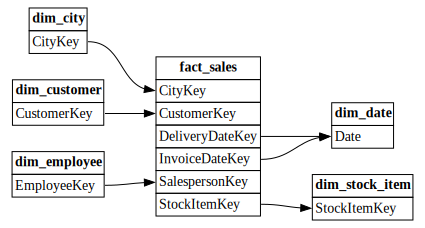

In [7]:
from sempy.relationships import plot_relationship_metadata

plot_relationship_metadata(fabric.list_relationships(dataset))

# List measures from semantic model sm_wwi_retail

In [8]:
fabric.list_measures(dataset)

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 12, Finished, Available)

,Table Name,Measure Name,Measure Expression,Measure Data Type,Measure Hidden,Measure Display Folder,Measure Description
0,fact_sales,Total_Profit,SUM(fact_sales[Profit]),Double,False,,
1,fact_sales,Total_Profit_Prev_Mon,"CALCULATE([Total_Profit], PARALLELPERIOD(dim_d...",Double,False,,
2,fact_sales,Total_Profit_MoM,"DIVIDE([Total_Profit]-[Total_Profit_Prev_Mon],...",Double,False,,


In [9]:
fabric.read_table(dataset, "dim_city", 100)

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 13, Finished, Available)

,dim_city[CityKey],dim_city[WWICityID],dim_city[City],dim_city[StateProvince],dim_city[Country],dim_city[Continent],dim_city[SalesTerritory],dim_city[Region],dim_city[Subregion],dim_city[Location],dim_city[LatestRecordedPopulation],dim_city[ValidFrom],dim_city[ValidTo],dim_city[LineageKey]
0,48027,19187,Leon,Oklahoma,United States,North America,Southwest,Americas,Northern America,POINT (-97.4529702885 33.8832159006),91,2013-01-01 00:01:00,1816-03-30 05:56:08.063277376,1
1,48029,19320,Lexington,Oklahoma,United States,North America,Southwest,Americas,Northern America,POINT (-97.3593665885 35.0187419006),2152,2013-01-01 00:01:00,1816-03-30 05:56:08.063277376,1
2,48030,19363,Liberty,Oklahoma,United States,North America,Southwest,Americas,Northern America,POINT (-96.0012763885 35.8626574006),220,2013-01-01 00:01:00,1816-03-30 05:56:08.063277376,1
3,48031,19426,Lima,Oklahoma,United States,North America,Southwest,Americas,Northern America,POINT (-96.6235204885 35.1779139006),53,2013-01-01 00:01:00,1816-03-30 05:56:08.063277376,1
4,48032,19528,Lindsay,Oklahoma,United States,North America,Southwest,Americas,Northern America,POINT (-97.6263149885 34.8387433006),2840,2013-01-01 00:01:00,1816-03-30 05:56:08.063277376,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116290,99931,31995,Somesville,Maine,United States,North America,New England,Americas,Northern America,POINT (-68.3341836 44.3623013),0,2014-07-01 16:00:00,1816-03-30 05:56:08.063277376,1
116291,99932,32016,Sorrento,Maine,United States,North America,New England,Americas,Northern America,POINT (-68.1772341 44.4734117),0,2014-07-01 16:00:00,1816-03-30 05:56:08.063277376,1
116292,99933,32042,South Berwick,Maine,United States,North America,New England,Americas,Northern America,POINT (-70.8095018 43.2345292),0,2014-07-01 16:00:00,1816-03-30 05:56:08.063277376,1
116293,99934,32053,South Bristol,Maine,United States,North America,New England,Americas,Northern America,POINT (-69.5611574 43.8639715),0,2014-07-01 16:00:00,1816-03-30 05:56:08.063277376,1


# Evaluate Measure

In [10]:
fabric.evaluate_measure(dataset, "Total_Profit")

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 14, Finished, Available)

,Total_Profit
0,17980267019.75


In [11]:
fabric.evaluate_measure(
    dataset,
   ["Total_Profit","Total_Profit_Prev_Mon"],
   ["'dim_date'[CalendarMonthNumber]"]
) 

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 15, Finished, Available)

,CalendarMonthNumber,Total_Profit,Total_Profit_Prev_Mon
0,1,1666414268.8,17980267019.749992
1,2,1551747583.0,17980267019.749992
2,3,1666844883.2,16313852750.949995
3,4,1608146981.2,14762105167.950003
4,5,1667631725.1,13095260284.75
5,6,1616322893.2,11487113303.550001
6,7,1671213036.7,9819481578.449999
7,8,1661307094.95,8203158685.249997
8,9,1600490162.0,6531945648.549998
9,10,1648937956.3,4870638553.599999


In [12]:
dax_total_profit_prev_mon = """
EVALUATE SUMMARIZECOLUMNS(
    'dim_date'[CalendarYear],
    'dim_date'[CalendarMonthNumber],
    FILTER('dim_city', 'dim_city'[Country] = "United States"),
    "Total_Profit_MoM", 
    CALCULATE([Total_Profit_MoM])
)
"""
fabric.evaluate_dax(
    dataset,
   dax_total_profit_prev_mon
) 


StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 16, Finished, Available)

,dim_date[CalendarYear],dim_date[CalendarMonthNumber],[Total_Profit_MoM]
0,2000,8,-0.005927
1,2000,3,0.074173
2,2000,7,0.03396
3,2000,5,0.03699
4,2000,10,0.030271
5,2000,11,-0.016815
6,2000,4,-0.035215
7,2000,6,-0.030767
8,2000,1,0.0
9,2000,9,-0.036608


In [19]:
# %%dax sm_wwi_retail  
# EVALUATE TOPN(5, fact_sales)

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 23, Finished, Available)

UsageError: Cell magic `%%dax` not found.


In [14]:
# %%dax sm_wwi_retail

# EVALUATE SUMMARIZECOLUMNS(
#     'dim_date'[CalendarYear],
#     'dim_date'[CalendarMonthNumber],
#     FILTER('dim_city', 'dim_city'[Country] = "United States"),
#     "Total_Profit_MoM", 
#     CALCULATE([Total_Profit_MoM])
#     )

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 18, Finished, Available)

# Testing measures with unittest

In [15]:
import unittest

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 19, Finished, Available)

In [16]:
class TestMeasures(unittest.TestCase):
    
    def test_total_profit(self):
        expected = spark.sql("SELECT sum(profit) FROM fact_sales").collect()[0][0]
        result = fabric.evaluate_measure("sm_wwi_retail","Total_Profit")["Total_Profit"][0]
        
        msg = f"expected {expected}\n, result {result}"
        self.assertEqual(expected, result, msg)


StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 20, Finished, Available)

In [17]:
unittest.main(argv=[''], verbosity=2, exit=False)

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 21, Finished, Available)

test_total_profit (__main__.TestMeasures) ... /home/trusted-service-user/cluster-env/clonedenv/lib/python3.10/socket.py:776: ResourceWarning: unclosed <socket.socket fd=210, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('127.0.0.1', 42642), raddr=('127.0.0.1', 33347)>
  self._sock = None
ok

----------------------------------------------------------------------
Ran 1 test in 28.072s

OK


# Programmatically refresh dataset

In [18]:
fabric.refresh_dataset(dataset, workspace)

StatementMeta(, f39df260-6265-403a-a755-915c41b5417e, 22, Finished, Available)

'656b2200-7872-4ecf-804a-a0b25503e644'

In [ ]:
%run /